# Описание проекта
Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.
ШАГИ
* Импортировать файлы,изучить данные в них;
* Проверить типы данных на корректность;
* Выбрать топ-10 городов по количеству рейсов;
* Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* Сделать выводы по каждому из графиков, пояснить результат.

Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import math as mt
import timeit 
from matplotlib import pyplot as plt
from scipy import stats as st
from math import factorial
from scipy.stats import norm
import seaborn as sns
ALPHA = 0.05
import warnings
warnings.simplefilter("ignore")

# Загрузка данных и их описание

In [2]:
model = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')

In [3]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Данные полностью заполнены, пропусков нет. Тип данных соответсвует описанию столбцов.

In [6]:
flights = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')

In [7]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [8]:
flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Данные полностью заполнены, пропусков нет. Тип данных соответсвует описанию столбцов.

# Топ-10 городов по количеству рейсов


Отбор топ-10 городов по количеству рейсов

In [9]:
city_top_all = flights.sort_values(by='average_flights', ascending=False).reset_index()
city_top =city_top_all[0:10]

In [10]:
city_top

,index,city,average_flights
0,43,Москва,129.774194
1,70,Санкт-Петербург,31.161290
2,54,Новосибирск,17.322581
3,33,Красноярск,11.580645
4,20,Екатеринбург,11.322581
5,67,Ростов-на-Дону,10.193548
6,63,Пермь,10.129032
7,10,Брянск,10.000000
8,74,Сочи,9.612903
9,84,Ульяновск,9.580645


# Графики

## Модели самолетов и количество рейсов

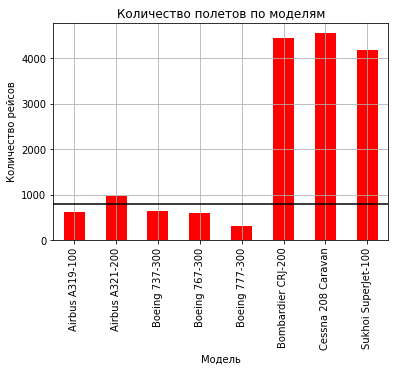

In [11]:
model_lights =  model.plot(x='model', 
                           kind = 'bar', 
                           grid=True,
                           legend=False,
                           colors='red')
model_lights.set_title('Количество полетов по моделям')
model_lights.set_xlabel('Модель')
model_lights.set_ylabel('Количество рейсов')
plt.hlines(model['flights_amount'].median(), xmin=-1, xmax=10, color='black');

Из графика видно, что Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100 и имеют более 4000 полётов за сентябрь 2018, что значительно превосходит по объёму перевозок самолёты моделей Airbus и Boeing. Веротяно, это связано с малой заинтересованностью российских перевозчиков в этих компаниях-производителях (Airbus и Boeing).

## Города и количество рейсов

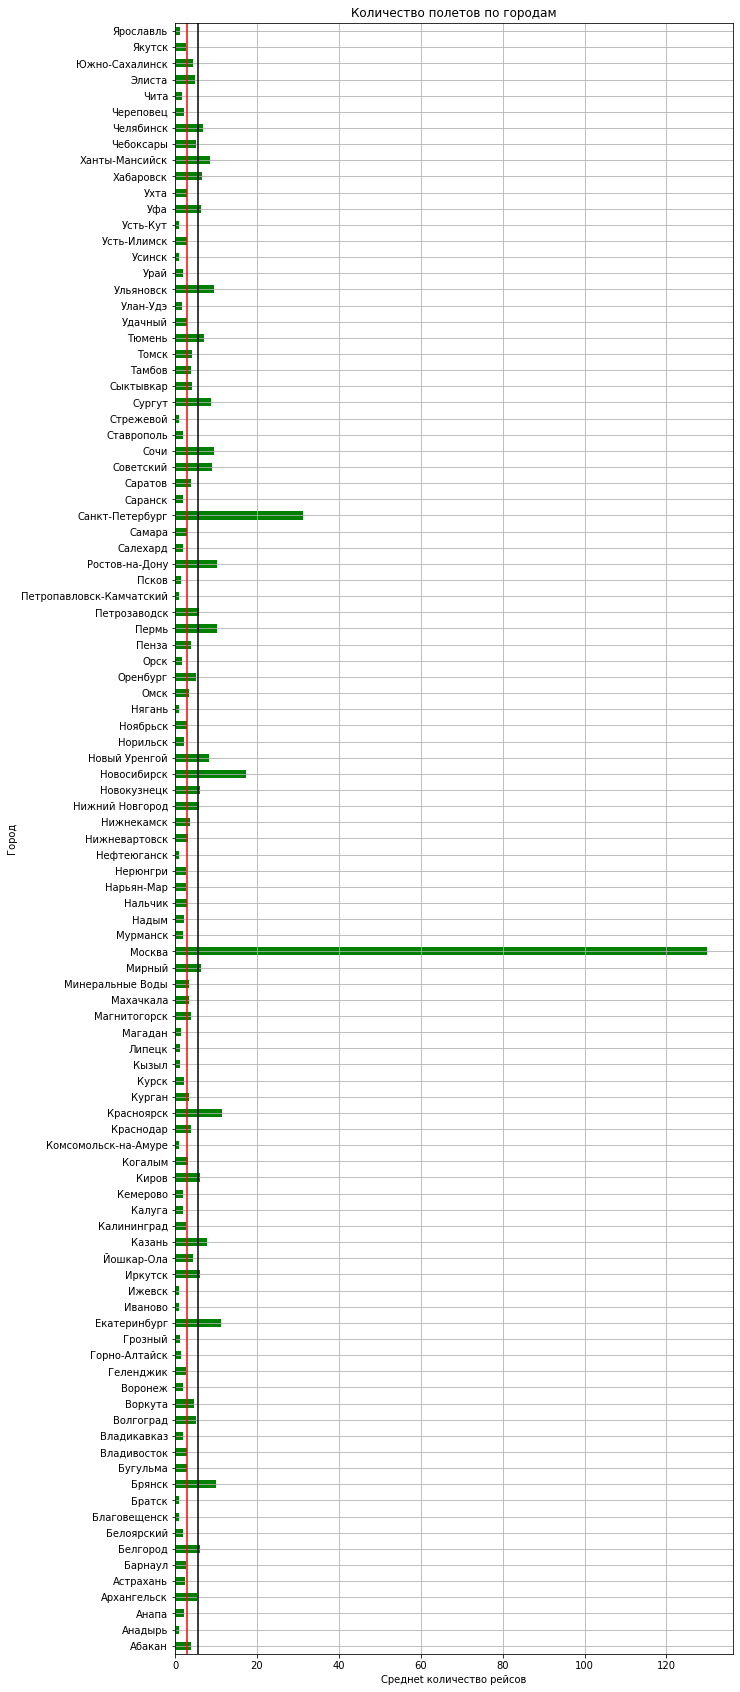

In [12]:
city_lights =  flights.plot(x='city', 
                            kind = 'barh', 
                            grid=True, 
                            figsize = (10,30),
                            legend=False,
                           colors='green')
city_lights.set_title('Количество полетов по городам')
city_lights.set_xlabel('Среднеt количество рейсов')
city_lights.set_ylabel('Город')
plt.axvline(x=flights['average_flights'].median(), color='red')
plt.axvline(x=flights['average_flights'].mean(), color='black');

Города Москва, Санкт-Петербург, Екатеринбург, Новосибирск, Красноярск, Брянск, Ростов-на-Дону, Перьмь, Сочи имеют наибольшее количество рейсов в день превышающее среднее и медианное значение. Вероятно, это связано их исключительным экономическим и культурным значением.

## Топ-10 городов и количество рейсов

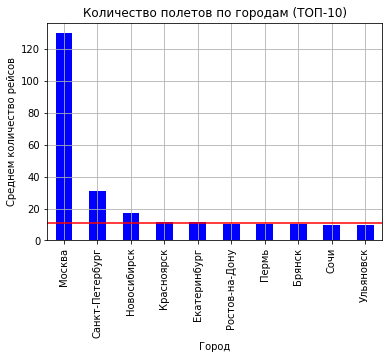

In [13]:
city_top_lights =  city_top.plot(x='city', 
                                 y='average_flights', 
                                 kind = 'bar', 
                                 grid=True,
                                 legend=False,
                                 colors='blue')
city_top_lights.set_title('Количество полетов по городам (ТОП-10)')
city_top_lights.set_xlabel('Город')
city_top_lights.set_ylabel('Среднем количество рейсов')
plt.hlines(city_top['average_flights'].median(), xmin=-1, xmax=10, color='red');

Среди городов Топ-10 значительно выделяются города Новосибирск, Санкт-Петербург и Москва, среднее количество прибывающих рейсов превышает медианной значение выборки. Что соотносится с их экономико-культурным положеним и количеством населения. 

# Выводы

Большинство полетов осуществляется в сталицы и города с высоким культурным значением и экономической значимостью, т.к. эти города имеют высокую привлекательность для командировок и туризма.